**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [1]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler #padronização e normalização

import seaborn as sns
import matplotlib.pyplot as plt

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd


## Tarefa #1: Recebendo os dados

In [2]:
#Realizar dowload o arquivo do drive
data_google_id = '1GKqOD_t_E_yQuG33fCgUZcl4cNHs2Ktb'
gdd(file_id=data_google_id,
    dest_path='./dados.csv',
    showsize=True,
    overwrite=True)
diabetes = pd.read_csv('dados.csv', sep=',')
diabetes.head()

32.0 KiB Done.


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Tarefa #2: Analise Exploratória dos Dados

Vamos ver informações gerais dos nossos dados:

In [ ]:
diabetes.info()

In [ ]:
diabetes.head()

In [ ]:
diabetes.describe() # conseguimos descobrir todas as informaçoes (media, range, minimo, mediana)

Podemos observar uma diferença significativa na escala dos dados quando comparamos a coluna `pedi` com a coluna `insu`. Um modelo de Aprendizado de Máquina **pode** se tornar tendencioso se essa diferença de escala continuar nos dados. Por isso, iremos ver os conceitos da **Normalização e Padronização dos Dados**

Antes disso, vamos explorar um pouco os dados fazendo um histrograma de todas as colunas numéricas e a contagem dos valores da coluna `class` do nosso conjunto de dados:

In [ ]:
sns.histplot(data=diabetes, x='mass', kde=True)

In [ ]:
diabetes.hist(figsize=(12,12))

In [ ]:
sns.countplot(data=diabetes, x='class')

## Tarefa #3: Dividindo o conjunto de dados e Aplicando a Normalização OU Padronização

Vamos supor que desejamos criar um modelo para estimar se uma pessoa possui ou não diabetes

In [ ]:
# Dividindo o conjunto de dados
X = diabetes.drop(columns=['class'])
y = diabetes['class']
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

Vamos aplicar a normalização e a padronização dos dados nas duas células a seguir:

In [ ]:
#instanciado um objeto de nomalização
scaler = MinMaxScaler()
#método fit
scaler.fit(X_train)
#Mudando scala de dados
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
#padronização
scaler = StandardScaler()
#método fit
scaler.fit(X_train)
#Mudando scala de dados
X_train_pad = scaler.transform(X_train)
X_test_pad = scaler.transform(X_test)

Vale a pena destacar que quando usamos o `MinMaxScaler().fit()` ou o `StandardScaler().fit(X_train)` para que fossem encontrados os mínimos e os máximos de cada uma das colunas ou a média e o desvio padrão de cada coluna respectivamente, passamos apenas a informação dos dados do conjunto de treinamento (`X_train`). As informações contidas no conjunto de teste (`X_test`) nunca devem influenciar o pré-processamento dos dados, pois estariamos obtendo informações de um conjunto de dados que não participa do treinamento.

Vamos agora verificar o que ocorreu com os dados quando aplicamos a normalização e a padronização. Para isso, iremos transformar os nossos dados em um DataFrame, apenas para facilitar a visualização dos dados:

In [ ]:
df_norm = pd.DataFrame(data=X_train_norm, columns=X_train.columns)
df_norm.head()

In [ ]:
df_pad = pd.DataFrame(data=X_train_pad, columns=X_train.columns)
df_pad.head()

### Dados normalizados:

In [ ]:
#Criando o grafico para comaparação
fig,eixos = plt.subplots(ncols=2,
                         nrows=2,
                         figsize=(15,20))
sns.histplot(data=X_train, x='mass', bins=20, kde=True, ax=eixos[0,0])
sns.histplot(data=df_norm, x='mass', bins=20, kde=True, ax=eixos[0,1])
sns.histplot(data=X_train, x='mass', bins=20, kde=True, ax=eixos[1,0])
sns.histplot(data=df_pad, x='mass', bins=20, kde=True, ax=eixos[1,1])

eixos [0,0].set_title('Antes da normalização')
eixos [0,1].set_title('Depois da normalização')
eixos [1,0].set_title('Antes da padronização')
eixos [1,1].set_title('Depois da padronização')


Podemos ver que a informação da distribuição dos dados não foi alterada antes e após a aplicação da normalização dos dados. Podemos observar apenas que os valores estão agora num intervalo de 0 até 1.

### Dados padronizados:

Podemos ver que a informação da distribuição dos dados não foi alterada antes e após a aplicação da padronização dos dados. Podemos observar apenas que a média dos dados está centralizada em 0 e existem valores negativos nos nossos dados.

# Exercício)

Para o conjunto de dados Admission_Predict.csv aplique a normalização no conjunto de dados e faça um histograma para comparar os dados antes e após a normalização.

In [ ]:
#Realizar dowload o arquivo do drive
data_google_id = '16ewlMrkyVGpeDxZw5IW0fEvxLIuCjRXD'
gdd(file_id=data_google_id,
    dest_path='./dados2.csv',
    showsize=True,
    overwrite=True)
adm= pd.read_csv('dados2.csv', sep=',')
adm.head()

0.0 B Done.


,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


array([[<Axes: title={'center': 'Serial_num.'}>,
        <Axes: title={'center': 'GRE_Score'}>,
        <Axes: title={'center': 'TOEFL_Score'}>],
       [<Axes: title={'center': 'University_Rating'}>,
        <Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance'}>]], dtype=object)

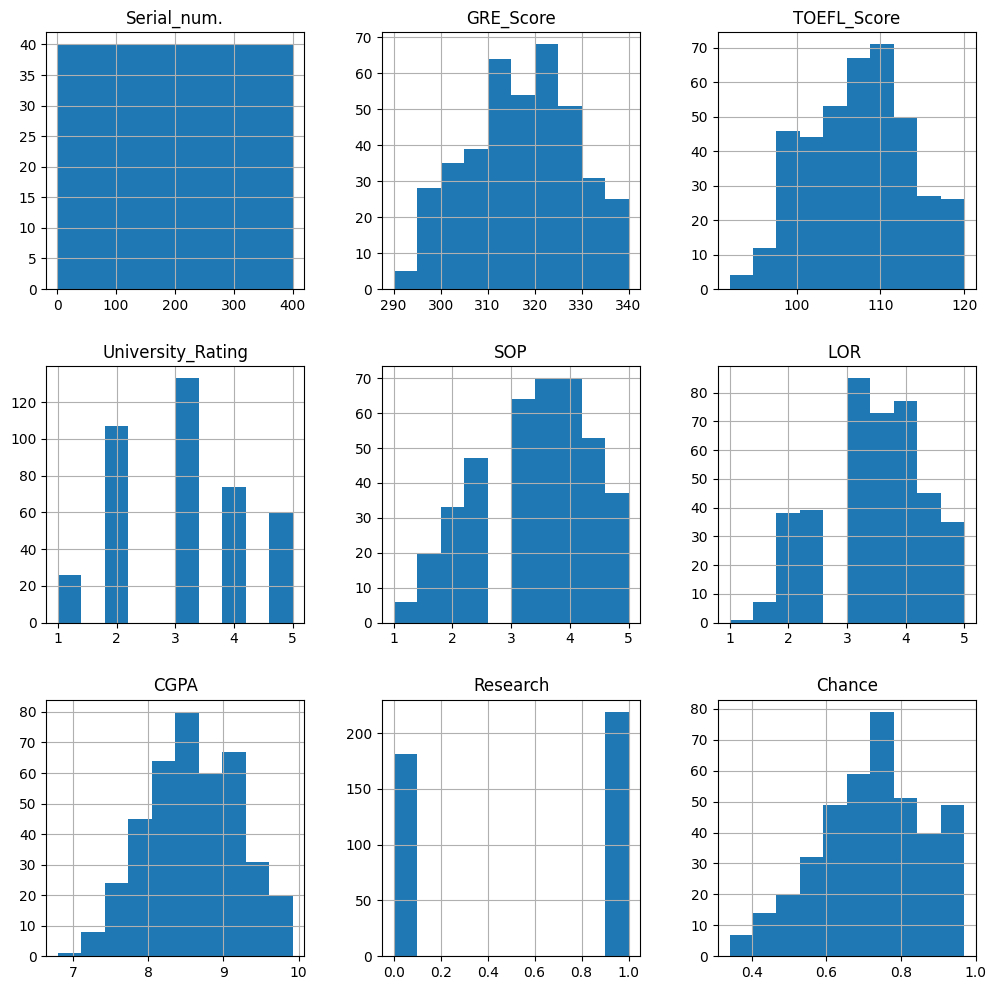

In [ ]:
adm.hist(figsize=(12,12))

In [ ]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_num.        400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance             400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
# Dividindo o conjunto de dados
X = adm.drop(columns=['Chance'])
y = adm['Chance']
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)


#instanciado um objeto de nomalização
scaler = MinMaxScaler()
#método fit
scaler.fit(X_train)
#Mudando scala de dados
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


#padronização
scaler = StandardScaler()
#método fit
scaler.fit(X_train)
#Mudando scala de dados
X_train_pad = scaler.transform(X_train)
X_test_pad = scaler.transform(X_test)

In [ ]:
# normalização
df_norm = pd.DataFrame(data=X_train_norm, columns=X_train.columns)
df_norm.head()

# Padronização
df_pad = pd.DataFrame(data=X_train_pad, columns=X_train.columns)
df_pad.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.491226,0.776976,-0.940129,0.784342,1.566770,1.671181,0.262499,0.893677
1,-0.233987,0.161692,0.391203,-0.087872,0.088269,0.030608,0.734758,-1.118973
2,-0.753275,0.864873,-0.607296,1.656557,-0.404565,0.030608,0.397430,0.893677
3,-0.081782,-0.102001,0.224786,-0.087872,0.088269,-0.516250,0.262499,-1.118973
4,0.231582,0.601180,0.557619,0.784342,-0.404565,-0.516250,0.684159,0.893677


Text(0.5, 1.0, 'Depois da padronização')

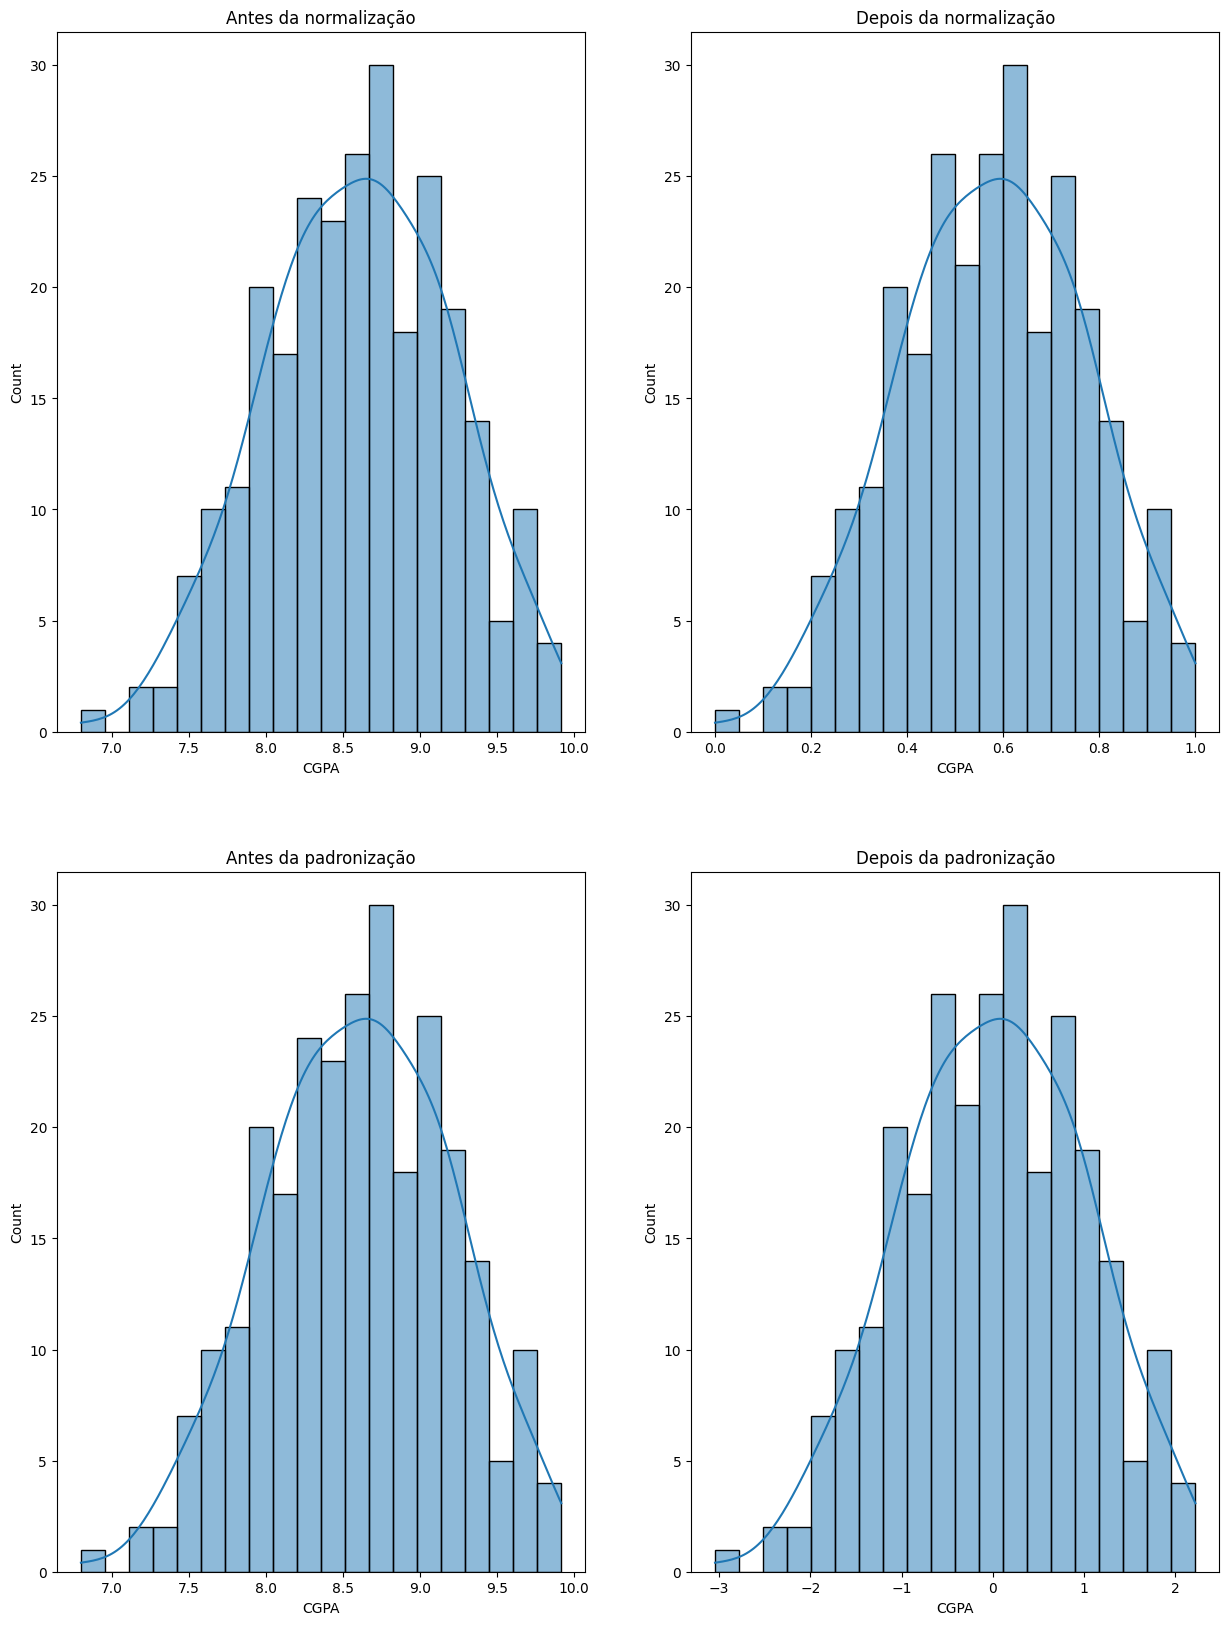

In [ ]:
#Criando o grafico para comaparação
fig,eixos = plt.subplots(ncols=2,
                         nrows=2,
                         figsize=(15,20))
sns.histplot(data=X_train, x='CGPA', bins=20, kde=True, ax=eixos[0,0])
sns.histplot(data=df_norm, x='CGPA', bins=20, kde=True, ax=eixos[0,1])
sns.histplot(data=X_train, x='CGPA', bins=20, kde=True, ax=eixos[1,0])
sns.histplot(data=df_pad, x='CGPA', bins=20, kde=True, ax=eixos[1,1])

eixos [0,0].set_title('Antes da normalização')
eixos [0,1].set_title('Depois da normalização')
eixos [1,0].set_title('Antes da padronização')
eixos [1,1].set_title('Depois da padronização')
